---
## Homework 06 - Matrices 
---

This assignment borrowed heavily from a similar assignment given in 2016 by Chris Ketelsen (original was in MATLAB)

### Problem 1:



Write a function called `mat_vec` that takes an $n \times n$ matrix $A$ and an $n-$vector $x$ as input and returns the product. 

- Do not use any built in dot products or inner product functions. You'll need a nested for loop.

- Use the code provided below, and enter your code where indicated. Note that I am having you time your function for $5000 \times 5000$ matrix. You will be comparing the time your algorithm takes here without using "vectorization" with how much faster it can be by utilizing vectorization. 

- Once you've written your own function, test it on the following product (code for test already given below): 

$\begin{bmatrix} 1 & 1 & 1 \\ 2 & 2 & 2 \\ 3 & 3 & 3 \end{bmatrix} \cdot \begin{bmatrix} 1 \\ 1 \\ 1  \end{bmatrix}$


In [1]:
import numpy as np
import time

def mat_vec(A,x):
    
    # Your code here.
    
    n = len(x)
    b = np.zeros(n)
    
    for i in range(n):
        for j in range(n):
            b[i] += A[i,j]*x[j]
    
    return b


In [2]:
# Test your function here:
A = np.array([[1,1,1],[2,2,2],[3,3,3]])
x = np.array([1,1,1])
mat_vec(A,x)

array([3., 6., 9.])

In [3]:
# Once you've written your function, execute this cell and see how slow loops are in Python!

A = np.ones((5000,5000))
x = np.ones((5000,1))

start = time.time()
mat_vec(A,x)
elapsed = time.time()-start

print("Your matrix-vector product function took this long:",elapsed)

Your matrix-vector product function took this long: 58.77552390098572


### Problem 2: 

In this problem, you will write two functions to compute the matrix-vector product of an $n \times n$ matrix $A$ and a column vector $x$, of length $n$.

**PART A:** Write a function called `axrow` that takes as arguments an $n \times n$ matrix $A$ and a length $n$ vector $x$ and returns the result of computing the matrix-vector product $b=Ax$ by the row-vector rule. Use vector operations only (that is, don't access elements of  $A$ or $x$  individually.) The value $b$ returned by your function can be a column vector or a row vector.

In [4]:
def axrow(A,x):
    n = len(x)
    
    b = []
    for i in range(n):
        b.append(np.dot(A[i,:],x))
    return b

In [5]:
# test
A = np.array([[1,1,1],[2,2,2],[3,3,3]])
x = np.array([1,1,1])
axrow(A,x)

[3, 6, 9]

**PART B:** Write a function called `axcol` that takes as arguments an $n \times n$ matrix $A$, and a length $n$ vector $x$ and returns thee result of computing the matrix-vector product $b=AX$ by taking a linear combination of the columns of $A$. Use vector operations whenever possible. The value $B$ returned by your function can be a column vector or a row vector **just be sure that you return the same type of vector as you did in PART A**.

In [6]:
def axcol(A,x):
    n = len(x)

    b = 0
    for j in range(n):
        b += A[:,j]*x[j]
    return b

In [7]:
axcol(A,x)

array([3, 6, 9])

**PART C:** The time required for a numerical program to run on a computer is determined by the number of floating-point operations performed and by the cost of memory access. The cost of the floating-point operations can usually be determined analytically, but the cost of memory access can be harder to determine. The memory access cost depends on the amount of data used, the order in which the data is accessed, and the structure of the computer itself.

The memory hierarchy of a typical cache-based computer includes, in order of increasing size and distance from the CPU: the registers, the caches, the main memory, and the disk. The time reequiired to access data from these components increases dramatically with distance from the CPU. For example, the access of a small amount of data from the cache may take as little as one clock cycle to complete, while the same access from main memory can take tens of clock cycles. (A clock cycle on a modern processor is typically on the order of a few nanoseconds.) The time to access the disk can be substantially longer, with access times growing into seconds or minutes in extreme cases. The access times grow proportionally as the amount of data increases.

A good numerical program is thus structured to avoid disk access as much as possible, both by reducing the amount of data used and by organizing its access to make the best use of memory hierarchy. Best performance is achieved by programs that also move little data in and out of main memory. In this part of the problem, we'll study how to organize some matrix computations to minimize the amount of distant memory accessed by minimizing the amount of data moved.

How to make optimal use of a memory hierarchy (particularly the caches) is a matter of active research. In this class, we'll be concerned primarily with the large order effects of reducing main memory or disk access.

In computations involving matrices, performance is strongly dependent on how the matrix is stored. An $m\times n$ matrix is stored as a one-dimensional array with $mn$ elements. The array is arranged either in _row-major order_ or in _column-major order_. A row-major storage scheme has the rows of the matrix stored one after the other as a vector, while the column-major scheme has the columns stored one after the other. For example, the row-major and the column-major schemes translate the following matrix
$$A = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix} $$

into $v_r = \begin{bmatrix} 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 \end{bmatrix}$ and $v_c = \begin{bmatrix} 1 & 4 & 7 & 2 & 5 & 8 & 3 & 6 & 9 \end{bmatrix}$, respectively.

An efficient matrix algebra routine uses the elements in the order as they appear in the one-dimensional array. Programs written in C use row-major order while programs written in Fortran use column-major order.

We will run our own experiment to see whether Python/NumPy uses row-major order or column major order.

---

Fill in the `timing_test` function below to have it perform the following tasks:

- Call your `axrow` function from above on the following matrix sizes (n):
$$[100, 200, 500,1000,1500,2000,2500,5000]$$
  Record the time it takes your function to execute for each dimension.
  
- Call your `axcol` function from above on the following matrix sizes (n):
$$[100, 200, 500,1000,1500,2000,2500,5000]$$
  Record the time it takes your function to execute for each dimension.
  
- Compute the matrix-vector product using the `numpy.dot()` function, again on the matrix sizes:
$$[100, 200, 500,1000,1500,2000,2500,5000]$$
  Record the time it takes this built-in function to execute for each dimension.
  
- Plot the matrix dimension by the corresponding times for each of the three function calls. Plot all three sets of values on the same axis. Include a legend in your plot. 

- Label the x-axis "Matrix Dimension (n)" and label the y-axis "Time"


In [8]:
import time

def timing_test():
    
    # Create a list of different array sizes to test the mat-vec timee for
    
    matrix_sizes = [100, 200, 500, 1000, 1500, 2000, 2500, 5000]
    
    axrow_times = []
    
    axcol_times = []
    
    numpy_times = []
    
    for size in matrix_sizes:
        
        matrix = np.ones((size, size))
        vector = np.ones((size,1))
        
        t_begin_r = time.time()
        axrow(matrix,vector)
        t_elapsed_r = time.time()-t_begin_r
        
        axrow_times.append(t_elapsed_r)
        
        t_begin_c = time.time()
        axcol(matrix,vector)
        t_elapsed_c = time.time()-t_begin_c
        
        axcol_times.append(t_elapsed_c)
        
        t_begin_n = time.time()
        np.dot(matrix,vector)
        t_elapsed_n = time.time()-t_begin_n
        
        numpy_times.append(t_elapsed_n)
        
    return axrow_times,axcol_times,numpy_times

    

In [9]:
timer, timec, timen = timing_test()

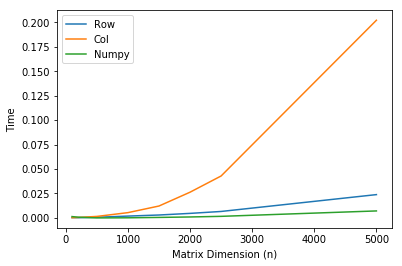

In [12]:
# Plotting

import matplotlib.pyplot as plt

matrix_sizes = [100, 200, 500, 1000, 1500, 2000, 2500, 5000]
plt.plot(matrix_sizes,timer)
plt.plot(matrix_sizes,timec)
plt.plot(matrix_sizes,timen)
plt.legend(["Row","Col","Numpy"])
plt.xlabel("Matrix Dimension (n)")
plt.ylabel("Time")
plt.show()

**PART D:** Using the plot that you generated in **PART C**, do you think that Python/NumPy uses row-major order or column-major order?

**Solution:** Looks like row-major!

**Extra Credit (1 point):** Execute the cell below to view an interesting bit of output. Now that we've run our experiment, how would you interpret the C_CONTIGUOUS and F_CONTIGUOUS flags?

In [11]:
# An interesting bit of output to look at. Now that we've run our experiment, 
# how would you interpret the flags?
import numpy as np
A = np.ones((5,5))
A.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False